# Analysis on wine dataset using k-folds method 

In [40]:
# Loading our libraries 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

` DO EDA FIRST `

In [41]:
df=pd.read_csv('../winequality-red.csv')

In [42]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
#Describe our data 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [44]:
# Get info on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [45]:
#Check datatypes

df.dtypes 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [46]:
# Number of columns in the table

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

`What are we predicting`

In [47]:
# We are predicting the wine quality 

# A heat  map of all variables 

<AxesSubplot:>

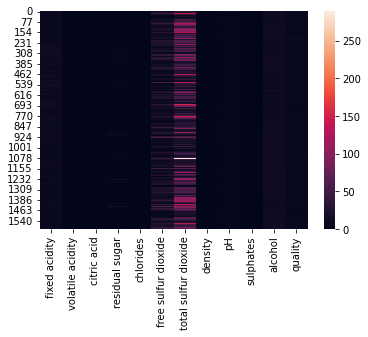

In [48]:
sns.heatmap(df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

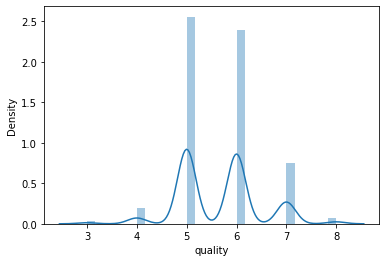

In [49]:
# Density plot od what we are predicting for


sns.distplot(df['quality'])

In [50]:
from sklearn.model_selection import KFold

folds=KFold(n_splits=10)

In [51]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values

y= df['quality']

In [52]:
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

we are using 10 folds


In [62]:
from sklearn.linear_model import LinearRegression

from sklearn import metrics


RMSES=[]
count=1 


for train_index, test_index in folds.split(X):

    X_train, X_test =X[train_index], X[test_index]
    y_train, y_test=y[train_index], y[test_index]


    regressor =LinearRegression()

    regressor.fit(X_train,y_train)

    y_pred=regressor.predict(X_test)

    rmse_value=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    RMSES.append(rmse_value)

    print('Model ' + str(count) + 'Root Mean Squared Error is ' +  str(rmse_value))

    count += 1

Model 1Root Mean Squared Error is 0.6862481195221863
Model 2Root Mean Squared Error is 0.6324703434524652
Model 3Root Mean Squared Error is 0.6850468988873286
Model 4Root Mean Squared Error is 0.6570566965861607
Model 5Root Mean Squared Error is 0.6137235391805052
Model 6Root Mean Squared Error is 0.7236010030500885
Model 7Root Mean Squared Error is 0.6328197305573449
Model 8Root Mean Squared Error is 0.6553239884798192
Model 9Root Mean Squared Error is 0.6014941518907089
Model 10Root Mean Squared Error is 0.6985130757721063


In [63]:
np.mean(RMSES)

0.6586297547378713